### Simulate some data points with a linear model and obtain $\ln R_{12}$
The model can be simply $y=mx+b$ with say fiducial $m=1$ and $b=0$, and then we can define two experiments that can measure $y$ with some error $\sigma_y(x)$. For the first simple test, we can assume that the data points are uncorrelated; this doesn't necessarily mean that the posterior for the model parameters $m,b$ will be uncorrelated. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from scipy.optimize import fmin_powell

def ymodel(x, m=1, b=0):
    return m*x + b

def yrealization(x, sigmay=1):
    # return a random realization for y(x)
    return np.random.normal(loc=ymodel(x), scale=sigmay)

In [16]:
xs1 = range(5)
xs2 = np.arange(-4.5, 0, 1)
xs = np.append(xs2, xs1)
os = np.ones(len(xs1))

[ 1.37229197 -0.37908861] [2.36095231 3.0784522 ] [ 1.30968928 -0.02082386]


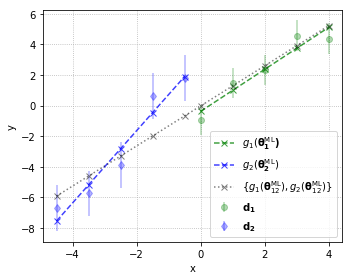

In [17]:
# just for single plot
######################
sigma1 = 1
sigma2 = 1.5

d1 = np.array([yrealization(i, sigmay=sigma1) for i in xs1])
d2 = np.array([yrealization(i, sigmay=sigma2) for i in xs2])

def chisq1(params):
    m, b = params
    th1 = np.array([ymodel(x, m=m, b=b) for x in xs1])
    return np.sum(((d1-th1)/sigma1)**2.0)

def chisq2(params):
    m, b = params
    th2 = np.array([ymodel(x, m=m, b=b) for x in xs2])
    return np.sum(((d2-th2)/sigma2)**2.0)

def chisq12(params):
    m, b = params
    return chisq1(params) + chisq2(params)

r1 = fmin_powell(chisq1, x0=[0,1], disp=0);
r2 = fmin_powell(chisq2, x0=[0,1], disp=0);
r12 = fmin_powell(chisq12, x0=[0,1], disp=0);

plt.figure(figsize=(5,4))

plt.errorbar(xs1, d1, sigma1*os , fmt="go", alpha=0.3, label=r"$\bf{d}_1$")
plt.plot(xs1, np.array([ymodel(x, m=r1[0], b=r1[1]) for x in xs1]), "g--x", label=r"$g_1(\bf{\theta}_1^{\rm ML})$", alpha=0.75)
plt.errorbar(xs2, d2, sigma2*os, fmt="bd", alpha=0.3, label=r"$\bf{d}_2$")
plt.plot(xs2, np.array([ymodel(x, m=r2[0], b=r2[1]) for x in xs2]), "b--x", label=r"$g_2(\bf{\theta}_2^{\rm ML}$)", alpha=0.75)

plt.plot(xs, np.array([ymodel(x, m=r12[0], b=r12[1]) for x in xs]), "kx", linestyle="dotted", alpha=0.5, label=r"$\{g_1({\bf{\theta}}_{12}^{\rm ML}), g_2({\bf{\theta}}_{12}^{\rm ML})\}$")
plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()

plt.grid(linestyle="dotted")

print (r1, r2, r12)
#plt.savefig("gtheta.pdf")

### Now compute the evidence ratio $R_{12}$ for the example datasets above

In [18]:
dbfsep1 = np.array([ymodel(x, m=r1[0], b=r1[1]) for x in xs1])
dbfsep2 = np.array([ymodel(x, m=r2[0], b=r2[1]) for x in xs2])

dbfcom1 = np.array([ymodel(x, m=r12[0], b=r12[1]) for x in xs1])
dbfcom2 = np.array([ymodel(x, m=r12[0], b=r12[1]) for x in xs2])

def lnlikesep(params):
        m, b = params
        th1 = np.array([ymodel(x, m=m, b=b) for x in xs1])
        th2 = np.array([ymodel(x, m=m, b=b) for x in xs2])

        return -0.5*(np.sum(((dbfsep1-th1)/sigma1)**2.) + np.sum((dbfsep2-th2)/sigma2)**2.)

def lnlikecom(params):
    m, b = params
    th1 = np.array([ymodel(x, m=m, b=b) for x in xs1])
    th2 = np.array([ymodel(x, m=m, b=b) for x in xs2])

    return -0.5*(np.sum(((dbfcom1-th1)/sigma1)**2.) + np.sum(((dbfcom2-th2)/sigma2)**2.))

from pymultinest.solve import solve

def Prior(cube):
    return -5+cube*10
    
def Loglike(cube):
    m, b = cube[0], cube[1]
    return -chisq12([m,b])

ressep = solve(LogLikelihood=lnlikesep, Prior=Prior, n_dims=2, resume=False,
           sampling_efficiency="model", n_live_points=400)
rescom = solve(LogLikelihood=lnlikecom, Prior=Prior, n_dims=2, resume=False,
           sampling_efficiency="model", n_live_points=400)

print (ressep['logZ']-rescom['logZ'], "+/-", ressep['logZerr']+rescom['logZerr'])

  analysing data from /tmp/tmpve1culb6pymultinest/.txt
  analysing data from /tmp/tmpwu39iod9pymultinest/.txt
-1.0529204719796947 +/- 0.22078205889089936
